# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

#Load the dataset for further analysis visually 

In [2]:
path_to_percustomer_orders_records='./input_data/peruser_order_attributes.csv'



In [3]:
df_peruser_orderdata=pd.read_csv(path_to_percustomer_orders_records)
df_peruser_orderdata.head()

,customer_id,num_restaurant_id_unique,num_city_id_unique,num_platform_id_unique,num_payment_id_unique,num_transmission_id_unique,amount_paid_mean,amount_paid_std,amount_paid_sum,amount_paid_q25,...,platform_id_29751,platform_id_29815,platform_id_30135,platform_id_30199,platform_id_30231,platform_id_30359,platform_id_30391,platform_id_30423,platform_id_525,is_returning_customer
0,000097eabfd9,1,1,1,1,1,11.46960,0.0,11.46960,11.46960,...,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,0
1,0000e2c6d9be,1,1,1,1,1,9.55800,0.0,9.55800,9.55800,...,0.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0
2,000133bb597f,1,1,1,1,1,5.93658,0.0,5.93658,5.93658,...,0.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,1
3,00018269939b,1,1,1,1,1,9.82350,0.0,9.82350,9.82350,...,0.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0
4,0001a00468a6,1,1,1,1,1,5.15070,0.0,5.15070,5.15070,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [4]:
df_peruser_orderdata.shape

(245455, 55)

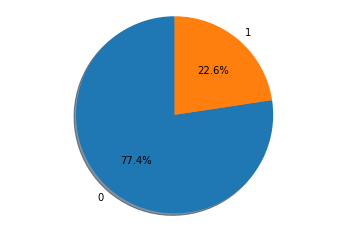

In [5]:
#fuction for percentage of customer churn
labels =df_peruser_orderdata["is_returning_customer"].value_counts().keys().tolist()
sizes = df_peruser_orderdata["is_returning_customer"].value_counts().values.tolist()

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

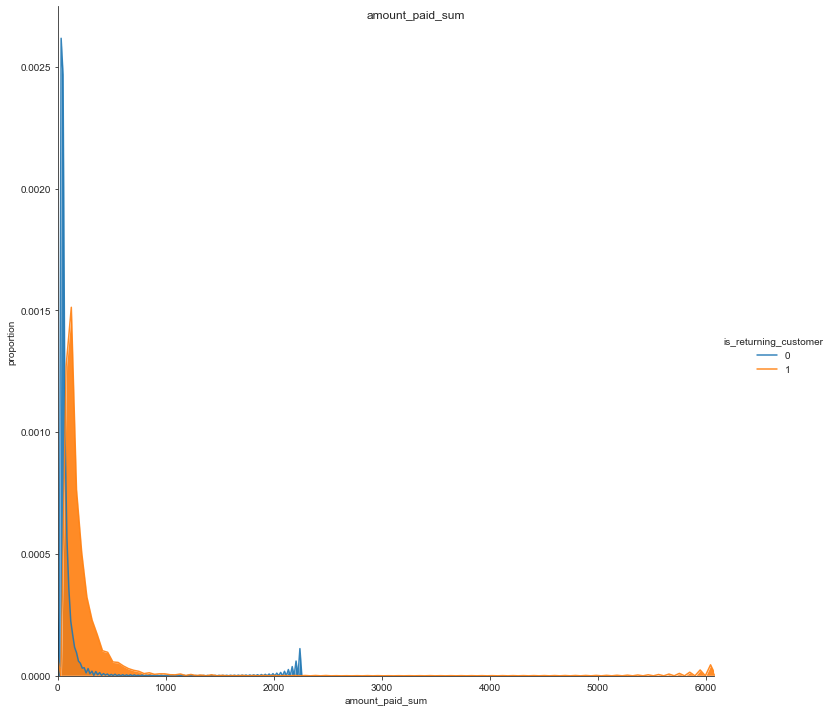

<Figure size 1440x720 with 0 Axes>

In [6]:
def plot_distribution_num(data_select) :
    sns.set_style("ticks")
    a = sns.FacetGrid(df_peruser_orderdata, hue = 'is_returning_customer',height=10)
    a.map(sns.kdeplot, data_select, shade = True, alpha = 0.9)
    a.set(xlim=(0, df_peruser_orderdata[data_select].max()))
    a.add_legend()
    a.set_axis_labels(data_select, 'proportion')
    a.fig.suptitle(data_select)
    plt.figure(figsize=(20,10))

    plt.show()

plot_distribution_num('amount_paid_sum')


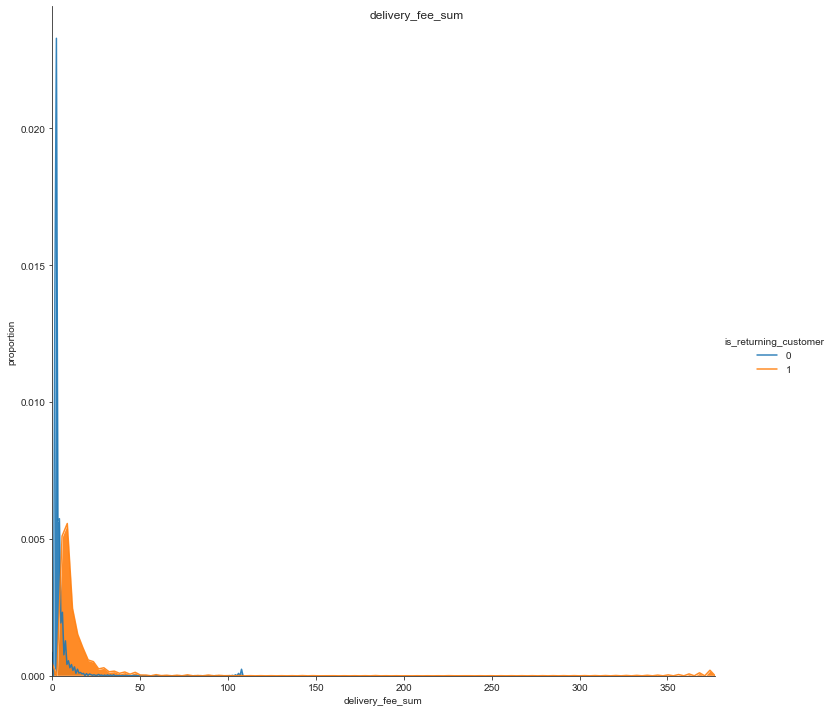

<Figure size 1440x720 with 0 Axes>

In [7]:
plot_distribution_num('delivery_fee_sum')


In [8]:
churn     = df_peruser_orderdata[df_peruser_orderdata["is_returning_customer"] == 0]
not_churn = df_peruser_orderdata[df_peruser_orderdata["is_returning_customer"] == 1]

In [13]:
df_peruser_orderdata.columns

Index(['customer_id', 'num_restaurant_id_unique', 'num_city_id_unique',
       'num_platform_id_unique', 'num_payment_id_unique',
       'num_transmission_id_unique', 'amount_paid_mean', 'amount_paid_std',
       'amount_paid_sum', 'amount_paid_q25', 'amount_paid_q75',
       'delivery_fee_mean', 'delivery_fee_sum', 'voucher_amount_mean',
       'voucher_amount_sum', 'used_voucher', 'paid_deliveryfee', 'paid_order',
       'avg_recency_days_orders', 'diff_days_in_first_last_order',
       'num_days_before_lastdate', 'num_days_before_firstdate', 'total_orders',
       'total_sucess_orders', 'total_failed_orders', 'payment_id_1491',
       'payment_id_1523', 'payment_id_1619', 'payment_id_1779',
       'payment_id_1811', 'transmission_id_1988', 'transmission_id_2020',
       'transmission_id_21124', 'transmission_id_212', 'transmission_id_4196',
       'transmission_id_4228', 'transmission_id_4260', 'transmission_id_4324',
       'transmission_id_4356', 'transmission_id_4996', 'platform_

In [9]:
len(churn)

189948

In [10]:
len(not_churn)

55507

In [19]:
num_cols=['amount_paid_sum','amount_paid_mean','delivery_fee_sum','diff_days_in_first_last_order','num_days_before_firstdate','num_days_before_lastdate','voucher_amount_sum','avg_recency_days_orders','total_sucess_orders','total_failed_orders','num_restaurant_id_unique','num_platform_id_unique']



<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

----------


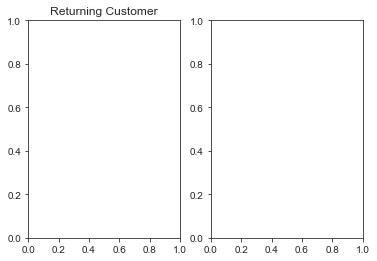

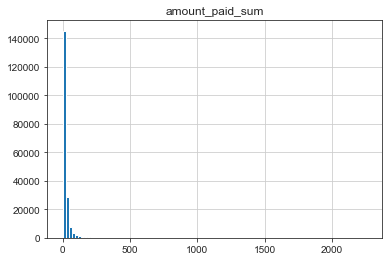

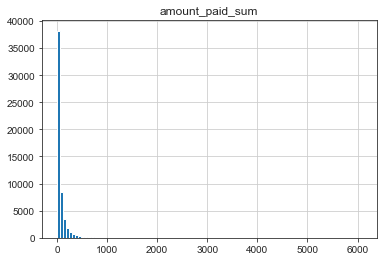

----------


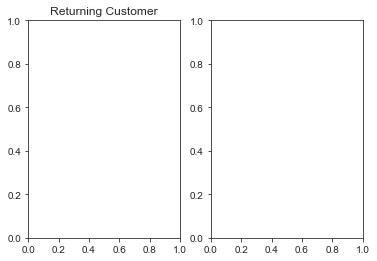

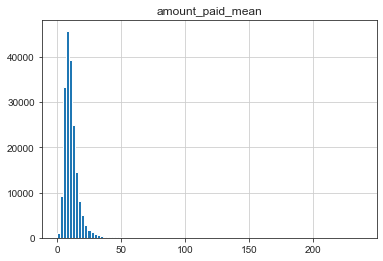

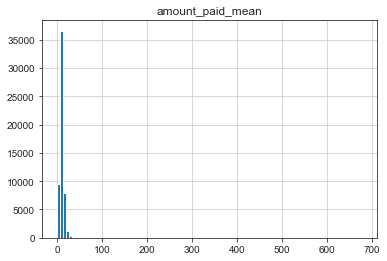

----------


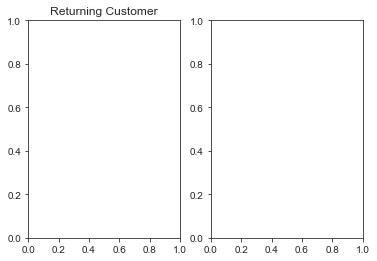

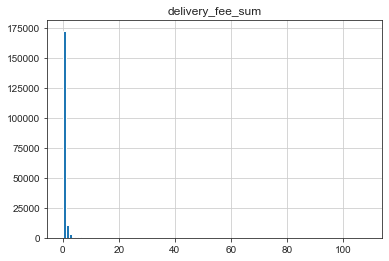

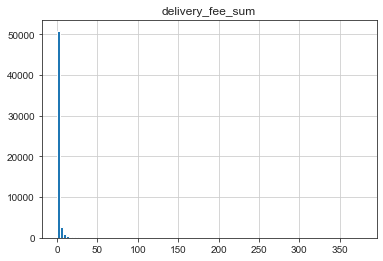

----------


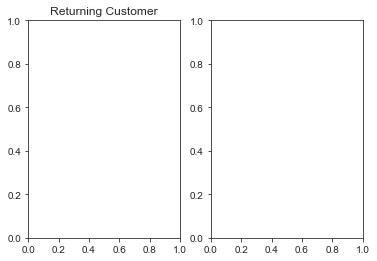

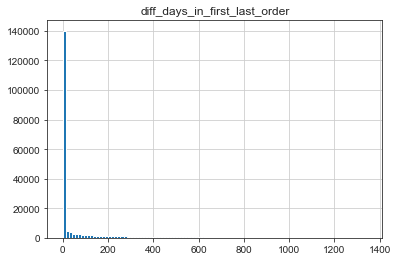

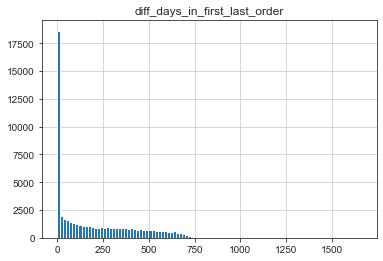

----------


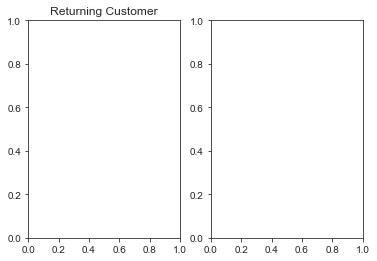

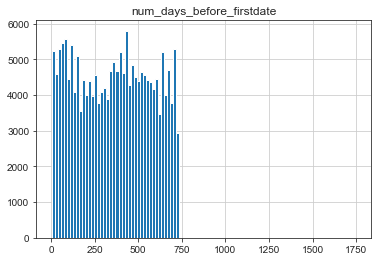

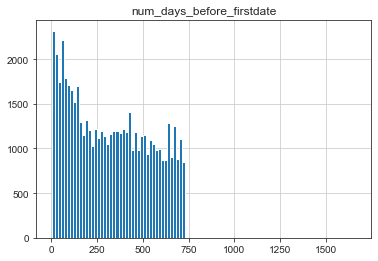

----------


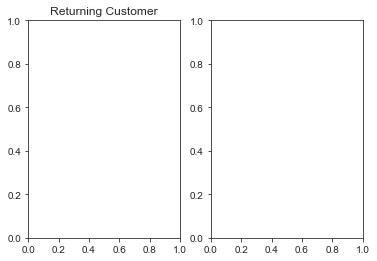

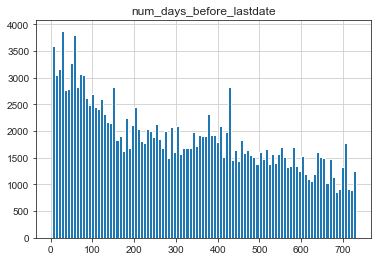

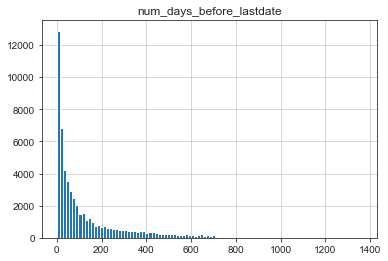

----------


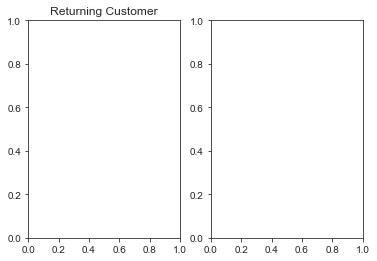

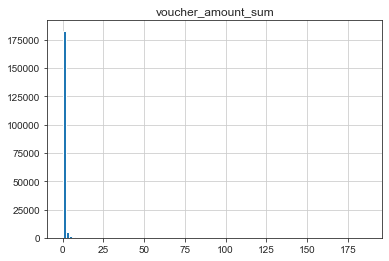

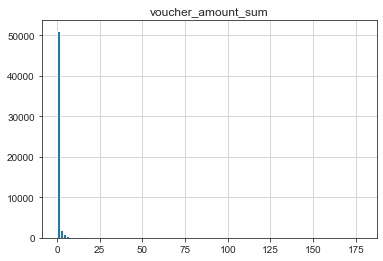

----------


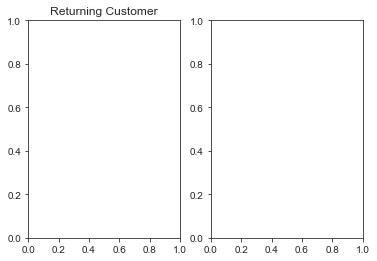

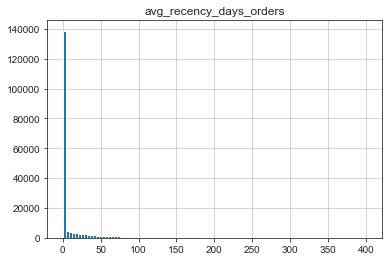

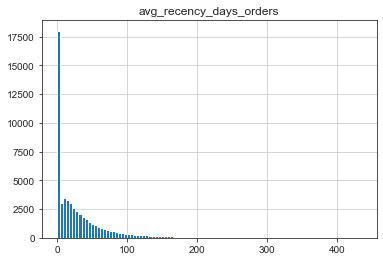

----------


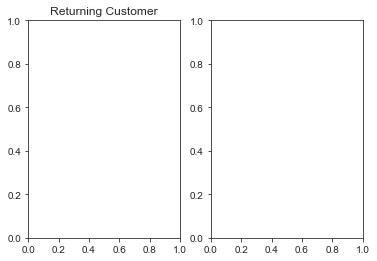

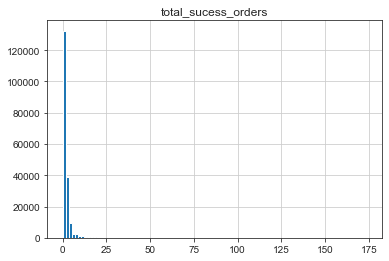

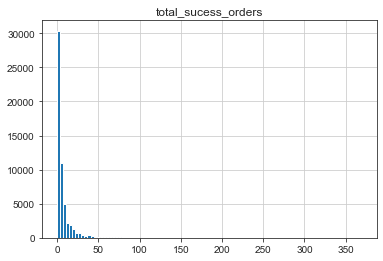

----------


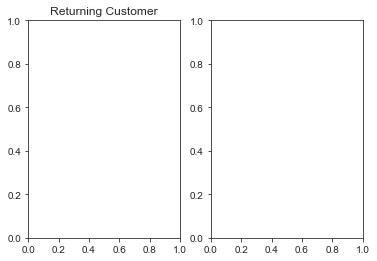

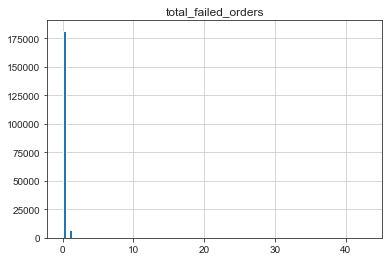

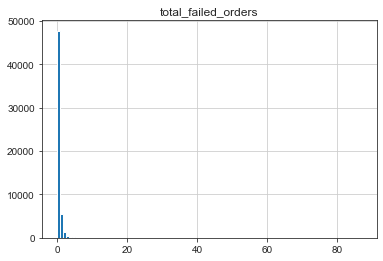

----------


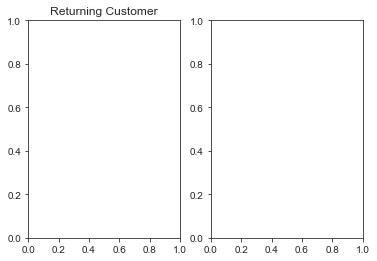

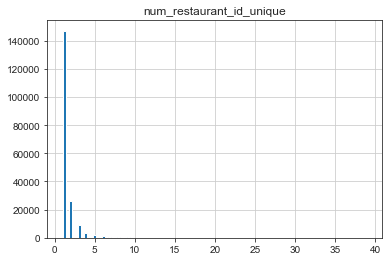

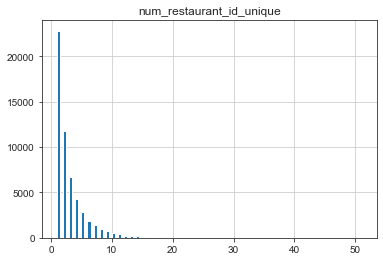

----------


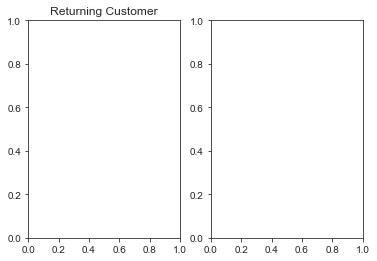

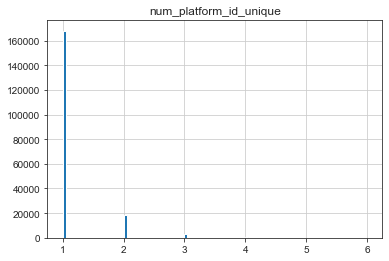

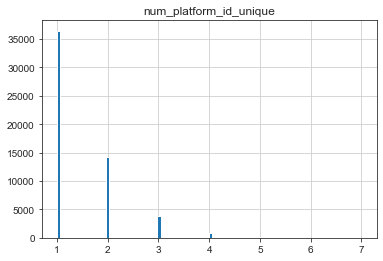

In [31]:
for col in num_cols:
    fig, axes = plt.subplots(1, 2)
    #fig.set(15, 5)
    churn.hist(col,bins=100)
    axes[0].set_title('churned')
    not_churn.hist(col,bins=100)
    print('----------')
    axes[0].set_title('Returning Customer')
    plt.show()